1. Install Dependencies and Setup

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue May 28 10:42:47 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

2. Load Data + 3. Scale Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data_path = "/content/drive/MyDrive/data100/"
test_data_path = "/content/drive/MyDrive/test100/"

In [ ]:
# ---- 設定資料擴增 ---- #
from tensorflow.keras.preprocessing.image import ImageDataGenerator

###使用資料擴增法生成訓練資料
train = ImageDataGenerator(rescale=1./255)
trn_gen = train.flow_from_directory( #←建立生成訓練資料的走訪器
    train_data_path,         #←指定目標資料夾
    target_size=(256, 256),  #←調整所有影像大小成 150x150
    batch_size=16,        #←每批次要生成多少筆資料
    color_mode="grayscale",
    class_mode='binary',     #←指定分類方式, 這裡是設為二元分類
    subset='training')       #←只生成前 75% 的訓練資料

testing = ImageDataGenerator(rescale=1/255)
test_gen = testing.flow_from_directory(
    test_data_path,
    target_size=(256, 256),
    color_mode="grayscale",
    batch_size=16,
    class_mode="binary")

Found 226 images belonging to 2 classes.
Found 38 images belonging to 2 classes.


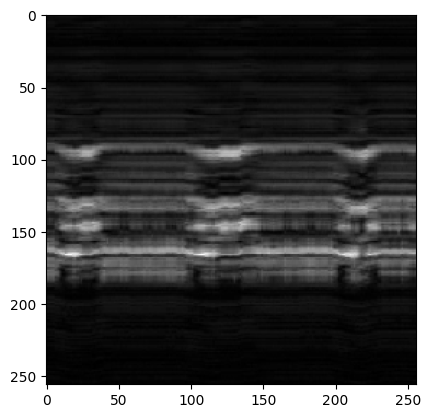

In [ ]:
import matplotlib.pyplot as plt
image, label = test_gen.next()
plt.imshow(image[0], cmap='gray')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os

# 載入數據
X = []
y = []
for class_name in ['0', '1']:
    class_dir = os.path.join(train_data_path, class_name)
    for img_name in os.listdir(class_dir):
        img = load_img(os.path.join(class_dir, img_name), target_size=(256, 256), color_mode='grayscale')
        X.append(img_to_array(img))
        y.append(class_name)

# 將載入的數據轉換為NumPy數組
X = np.array(X)
X = X/255
X = np.repeat(X, 3, axis=-1)
y = np.array(y)

# 將目標變量轉換為二進制標籤
y = (y == '1').astype(int)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os

# 載入數據
Xtest = []
ytest = []
for class_name in ['0', '1']:
    class_dir = os.path.join(test_data_path, class_name)
    for img_name in os.listdir(class_dir):
        img = load_img(os.path.join(class_dir, img_name), target_size=(256, 256), color_mode='grayscale')
        Xtest.append(img_to_array(img))
        ytest.append(class_name)

# 將載入的數據轉換為NumPy數組
Xtest = np.array(Xtest)
Xtest = Xtest/255
Xtest = np.repeat(Xtest, 3, axis=-1)
ytest = np.array(ytest)

# 將目標變量轉換為二進制標籤
ytest = (ytest == '1').astype(int)

In [ ]:
ytest

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

0


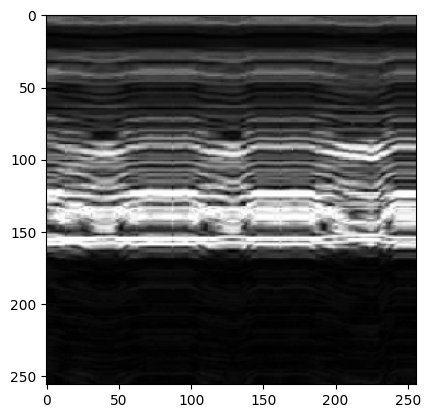

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[0], cmap='gray')
print(y[0])

*4*. Split Data + 5. Smote

In [ ]:
# !pip install imblearn
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=1)

In [ ]:
# X_2d = X.reshape(X.shape[0],X.shape[1]*X.shape[2]*X.shape[3])

In [ ]:
# X_2d.shape

In [ ]:
# # 標準化
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler().fit(X_2d)
# X_scaled = scaler.transform(X_2d)

In [ ]:
# X_scaled.shape

In [ ]:
# y.shape

In [ ]:
# X_smote, y_smote = smote.fit_resample(X_scaled, y)

In [ ]:
# X_smote.shape

In [ ]:
# y_smote.shape

In [ ]:
# unique, counts = np.unique(y_smote, return_counts=True)
# dict(zip(unique, counts))

In [ ]:
# sum(counts)

In [ ]:
# from sklearn.utils import shuffle
# X_S, Y = shuffle(X_smote, y_smote, random_state=42)

In [ ]:
# X = X_S.reshape(sum(counts),X.shape[1],X.shape[2],X.shape[3])

In [ ]:
# X.shape

In [ ]:
# Xtest_2d = Xtest.reshape(Xtest.shape[0],Xtest.shape[1]*Xtest.shape[2]*Xtest.shape[3])

In [ ]:
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=42)

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# trn_gen.class_indices

In [ ]:
# X_train.shape

In [ ]:
# Y_train

In [ ]:
# Y_val

In [ ]:
import matplotlib.pyplot as plt

# 繪製線圖 (可將訓練時所傳回的損失值或準確率等歷史記錄繪製成線圖)
# history: 內含一或多筆要繪資料的字典, 例如：{'loss': [4,2,1,…], 'acc': [2,3,5,…]}
# keys: 以 tuple 或串列指定 history 中要繪製的 key 值, 例如：('loss', 'acc')
# title: 以字串指定圖表的標題文字
# xyLabel: 以 tuple 或串列指定 x, y 軸的說明文字, 例如：('epoch', 'Accuracy')
# ylim: 以 tuple 或串列指定 y 軸的最小值及最大值, 例如 (1, 3), 超出範圍的值會被忽略
# size: 以 tuple 指定圖的尺寸, 預設為 (6, 4) (即寬 6 高 4 英吋)
def plot(history_dict, keys, title=None, xyLabel=[], ylim=(), size=()):
    lineType = ('-', '--', '.', ':')    # 線條的樣式, 畫多條線時會依序採用
    if len(ylim)==2: plt.ylim(*ylim)    # 設定 y 軸最小值及最大值
    if len(size)==2: plt.gcf().set_size_inches(*size)  # size預設為 (6,4)
    epochs = range(1, len(history_dict[keys[0]])+1)  # 計算有幾週期的資料
    for i in range(len(keys)):   # 走訪每一個 key (例如 'loss' 或 'acc' 等)
        plt.plot(epochs, history_dict[keys[i]], lineType[i])  # 畫出線條
    if title:   # 是否顯示標題欄
        plt.title(title)
    if len(xyLabel)==2:  # 是否顯示 x, y 軸的說明文字
        plt.xlabel(xyLabel[0])
        plt.ylabel(xyLabel[1])
    plt.legend(keys, loc='best') # 顯示圖例 (會以 key 為每條線的說明)
    plt.show()  # 顯示出畫好的圖

#繪製多個影像資料及其對應的標籤值
#參數：
#  imgs、labels 為影像資料及標籤值
#  grid 為 (水平, 垂直) 個子圖表, 預設為水平 1 排中有 10 個子圖表
#  size 為圖表的 (寬, 高), 預設為 (20英吋, 2英吋)
def plot_img(imgs, labels=[], grid=(1, 10), size=(20, 2)):
    n = len(imgs)                     #←計算樣本數
    plt.gcf().set_size_inches(size)   #←指定圖表的寬度,高度 (英吋=2.54公分)
    for i in range(n):                #←依樣本數走訪
        ax = plt.subplot(grid[0], grid[1], i+1)   #←取得對應位置的子圖表 (共有 (1x樣本數) 個子圖表)
        ax.imshow(imgs[i])            #←顯示樣本 (影像) 內容
        if len(labels):
            ax.set_title(f'Label={labels[i]}')    #←以對應的標籤值做為子圖表的標題
        ax.set_xticks([]); ax.set_yticks([]) #←設定 X, Y 軸不顯示刻度
    plt.show()      #←實際顯示圖片


In [ ]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=1)

In [ ]:
# X_train.shape

In [ ]:
# Y_train

In [ ]:
# X_train_2d = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2]*X_train.shape[3])
# X_val_2d = X_val.reshape(X_val.shape[0],X_val.shape[1]*X_val.shape[2]*X_val.shape[3])

In [ ]:
# # 標準化
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler().fit(X_train_2d)
# X_train_scaled = scaler.transform(X_train_2d)
# X_val_scaled = scaler.transform(X_val_2d)

In [ ]:
# X_train_scaled.shape

In [ ]:
# X_val_scaled.shape

In [ ]:
# unique, counts = np.unique(Y_train, return_counts=True)
# dict(zip(unique, counts))

In [ ]:
# unique, counts = np.unique(Y_val, return_counts=True)
# dict(zip(unique, counts))

In [ ]:
# X_train_scaled_smote, y_train_smote = smote.fit_resample(X_train_scaled, Y_train)

In [ ]:
# X_train_scaled_smote.shape

In [ ]:
# y_train_smote.shape

In [ ]:
# unique, counts = np.unique(y_train_smote, return_counts=True)
# dict(zip(unique, counts))

In [ ]:
# y_train_smote

6. 資料分析

In [ ]:
y.reshape(1,-1)

array([[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
        0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
        1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
        0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
        1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        0, 0, 0, 0, 1, 0]])

In [ ]:
y.shape

(226,)

In [ ]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt

# # 假設 X_train 和 X_test 是你的訓練集和測試集
# pca = PCA(n_components=2)
# X_train_pca = pca.fit_transform(X_scaled.T)
# X_test_pca = pca.transform(y.reshape(1,-1))

# plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], color='blue', label='Train')
# plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], color='red', label='Test')
# plt.legend()
# plt.show()

In [ ]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt

# # 假設 X_train 和 X_test 是你的訓練集和測試集
# pca = PCA(n_components=2)
# X_train_pca = pca.fit_transform(X_scaled)
# X_test_pca = pca.transform(Xtest_2d)

# plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], color='blue', label='Train')
# plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], color='red', label='Test')
# plt.legend()
# plt.show()

7. Build Model

In [ ]:
# pip install lazypredict

In [ ]:
# #特徵直接建模
# from lazypredict.Supervised import LazyClassifier
# from sklearn.datasets import load_breast_cancer
# from sklearn.model_selection import train_test_split
# clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
# models,predictions = clf.fit(X_train_scaled, X_val_scaled, Y_train, Y_val)
# print(models)

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.utils import shuffle
from sklearn.linear_model import Lasso, LassoCV, LogisticRegression, ElasticNet, ElasticNetCV, Ridge
from sklearn.svm import SVC, LinearSVC
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, VotingClassifier
from sklearn.feature_selection import RFE, SelectKBest, SelectFromModel, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import export_graphviz, ExtraTreeClassifier, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# #LogisticRegression
# # 選擇模型並訓練
# clf_LogisticRegression = LogisticRegression(class_weight="balanced")
# clf_LogisticRegression.fit(X_train_scaled_smote, y_train_smote)

# y_pred = clf_LogisticRegression.predict(X_train_scaled_smote)
# tn, fp, fn, tp = confusion_matrix(y_train_smote, y_pred).ravel()
# matrix=confusion_matrix(y_train_smote, y_pred)
# auc = roc_auc_score(y_train_smote, y_pred)
# sen = tp / (tp+fn)
# spe = tn / (tn+fp)
# PPV = tp / (tp+fp)
# NPV = tn / (tn+fn)
# ACC = (tp+tn)/(tp+tn+fp+fn)
# print(auc, ACC, sen, spe, PPV, NPV)
# print(matrix)
# y_pred = clf_LogisticRegression.predict(X_val_scaled)
# tn, fp, fn, tp = confusion_matrix(Y_val, y_pred).ravel()
# matrix=confusion_matrix(Y_val, y_pred)
# auc = roc_auc_score(Y_val, y_pred)
# sen = tp / (tp+fn)
# spe = tn / (tn+fp)
# PPV = tp / (tp+fp)
# NPV = tn / (tn+fn)
# ACC = (tp+tn)/(tp+tn+fp+fn)
# print('LogisticRegression')
# print(auc, ACC, sen, spe, PPV, NPV)
# print(matrix)

In [ ]:
# #clf_SVC
# # 選擇模型並訓練
# clf_SVC = SVC(class_weight="balanced")
# clf_SVC.fit(X_train_scaled_smote, y_train_smote)

# #預測並評估模型
# y_pred = clf_SVC.predict(X_train_scaled_smote)
# tn, fp, fn, tp = confusion_matrix(y_train_smote, y_pred).ravel()
# matrix=confusion_matrix(y_train_smote, y_pred)
# auc = roc_auc_score(y_train_smote, y_pred)
# sen = tp / (tp+fn)
# spe = tn / (tn+fp)
# PPV = tp / (tp+fp)
# NPV = tn / (tn+fn)
# ACC = (tp+tn)/(tp+tn+fp+fn)
# print(auc, ACC, sen, spe, PPV, NPV)
# print(matrix)
# y_pred = clf_SVC.predict(X_val_scaled)
# tn, fp, fn, tp = confusion_matrix(Y_val, y_pred).ravel()
# matrix=confusion_matrix(Y_val, y_pred)
# auc = roc_auc_score(Y_val, y_pred)
# sen = tp / (tp+fn)
# spe = tn / (tn+fp)
# PPV = tp / (tp+fp)
# NPV = tn / (tn+fn)
# ACC = (tp+tn)/(tp+tn+fp+fn)
# print('SVC')
# print(auc, ACC, sen, spe, PPV, NPV)
# print(matrix)

In [ ]:
# #clf_LinearSVC
# # 選擇模型並訓練
# clf_LinearSVC = LinearSVC(class_weight="balanced")
# clf_LinearSVC.fit(X_train_scaled_smote, y_train_smote)

# #預測並評估模型
# y_pred = clf_LinearSVC.predict(X_train_scaled_smote)
# tn, fp, fn, tp = confusion_matrix(y_train_smote, y_pred).ravel()
# matrix=confusion_matrix(y_train_smote, y_pred)
# auc = roc_auc_score(y_train_smote, y_pred)
# sen = tp / (tp+fn)
# spe = tn / (tn+fp)
# PPV = tp / (tp+fp)
# NPV = tn / (tn+fn)
# ACC = (tp+tn)/(tp+tn+fp+fn)
# print(auc, ACC, sen, spe, PPV, NPV)
# print(matrix)
# y_pred = clf_LinearSVC.predict(X_val_scaled)
# tn, fp, fn, tp = confusion_matrix(Y_val, y_pred).ravel()
# matrix=confusion_matrix(Y_val, y_pred)
# auc = roc_auc_score(Y_val, y_pred)
# sen = tp / (tp+fn)
# spe = tn / (tn+fp)
# PPV = tp / (tp+fp)
# NPV = tn / (tn+fn)
# ACC = (tp+tn)/(tp+tn+fp+fn)
# print('LinearSVC')
# print(auc, ACC, sen, spe, PPV, NPV)
# print(matrix)

In [ ]:
# #KNeighborsClassifier
# # 選擇模型並訓練
# clf_KNeighborsClassifier = KNeighborsClassifier()
# clf_KNeighborsClassifier.fit(X_train_scaled_smote, y_train_smote)

# #預測並評估模型
# y_pred = clf_KNeighborsClassifier.predict(X_train_scaled_smote)
# tn, fp, fn, tp = confusion_matrix(y_train_smote, y_pred).ravel()
# matrix=confusion_matrix(y_train_smote, y_pred)
# auc = roc_auc_score(y_train_smote, y_pred)
# sen = tp / (tp+fn)
# spe = tn / (tn+fp)
# PPV = tp / (tp+fp)
# NPV = tn / (tn+fn)
# ACC = (tp+tn)/(tp+tn+fp+fn)
# print(auc, ACC, sen, spe, PPV, NPV)
# print(matrix)
# y_pred = clf_KNeighborsClassifier.predict(X_val_scaled)
# tn, fp, fn, tp = confusion_matrix(Y_val, y_pred).ravel()
# matrix=confusion_matrix(Y_val, y_pred)
# auc = roc_auc_score(Y_val, y_pred)
# sen = tp / (tp+fn)
# spe = tn / (tn+fp)
# PPV = tp / (tp+fp)
# NPV = tn / (tn+fn)
# ACC = (tp+tn)/(tp+tn+fp+fn)
# print('KNeighborsClassifier')
# print(auc, ACC, sen, spe, PPV, NPV)
# print(matrix)

In [ ]:
# #DecisionTreeClassifier
# # 選擇模型並訓練
# clf_DecisionTreeClassifier = DecisionTreeClassifier(max_depth=10,class_weight="balanced")
# clf_DecisionTreeClassifier.fit(X_train_scaled_smote, y_train_smote)

# #預測並評估模型
# y_pred = clf_DecisionTreeClassifier.predict(X_train_scaled_smote)
# tn, fp, fn, tp = confusion_matrix(y_train_smote, y_pred).ravel()
# matrix=confusion_matrix(y_train_smote, y_pred)
# auc = roc_auc_score(y_train_smote, y_pred)
# sen = tp / (tp+fn)
# spe = tn / (tn+fp)
# PPV = tp / (tp+fp)
# NPV = tn / (tn+fn)
# ACC = (tp+tn)/(tp+tn+fp+fn)
# print(auc, ACC, sen, spe, PPV, NPV)
# print(matrix)
# y_pred = clf_DecisionTreeClassifier.predict(X_val_scaled)
# tn, fp, fn, tp = confusion_matrix(Y_val, y_pred).ravel()
# matrix=confusion_matrix(Y_val, y_pred)
# auc = roc_auc_score(Y_val, y_pred)
# sen = tp / (tp+fn)
# spe = tn / (tn+fp)
# PPV = tp / (tp+fp)
# NPV = tn / (tn+fn)
# ACC = (tp+tn)/(tp+tn+fp+fn)
# print('DecisionTreeClassifier')
# print(auc, ACC, sen, spe, PPV, NPV)
# print(matrix)

In [ ]:
# #clf_RandomForestClassifier
# # 選擇模型並訓練
# clf_RandomForestClassifier = RandomForestClassifier(max_depth=10,class_weight="balanced")
# clf_RandomForestClassifier.fit(X_train_scaled_smote, y_train_smote)

# #預測並評估模型
# y_pred = clf_RandomForestClassifier.predict(X_train_scaled_smote)
# tn, fp, fn, tp = confusion_matrix(y_train_smote, y_pred).ravel()
# matrix=confusion_matrix(y_train_smote, y_pred)
# auc = roc_auc_score(y_train_smote, y_pred)
# sen = tp / (tp+fn)
# spe = tn / (tn+fp)
# PPV = tp / (tp+fp)
# NPV = tn / (tn+fn)
# ACC = (tp+tn)/(tp+tn+fp+fn)
# print(auc, ACC, sen, spe, PPV, NPV)
# print(matrix)
# y_pred = clf_RandomForestClassifier.predict(X_val_scaled)
# tn, fp, fn, tp = confusion_matrix(Y_val, y_pred).ravel()
# matrix=confusion_matrix(Y_val, y_pred)
# auc = roc_auc_score(Y_val, y_pred)
# sen = tp / (tp+fn)
# spe = tn / (tn+fp)
# PPV = tp / (tp+fp)
# NPV = tn / (tn+fn)
# ACC = (tp+tn)/(tp+tn+fp+fn)
# print('RandomForestClassifier')
# print(auc, ACC, sen, spe, PPV, NPV)
# print(matrix)

In [ ]:
# #ExtraTreeClassifier
# # 選擇模型並訓練
# clf_ExtraTreeClassifier1 = ExtraTreeClassifier(max_depth=10,class_weight="balanced")
# clf_ExtraTreeClassifier1.fit(X_train_scaled_smote, y_train_smote)

# #預測並評估模型
# y_pred = clf_ExtraTreeClassifier1.predict(X_train_scaled_smote)
# tn, fp, fn, tp = confusion_matrix(y_train_smote, y_pred).ravel()
# matrix=confusion_matrix(y_train_smote, y_pred)
# auc = roc_auc_score(y_train_smote, y_pred)
# sen = tp / (tp+fn)
# spe = tn / (tn+fp)
# PPV = tp / (tp+fp)
# NPV = tn / (tn+fn)
# ACC = (tp+tn)/(tp+tn+fp+fn)
# print(auc, ACC, sen, spe, PPV, NPV)
# print(matrix)
# y_pred = clf_ExtraTreeClassifier1.predict(X_val_scaled)
# tn, fp, fn, tp = confusion_matrix(Y_val, y_pred).ravel()
# matrix=confusion_matrix(Y_val, y_pred)
# auc = roc_auc_score(Y_val, y_pred)
# sen = tp / (tp+fn)
# spe = tn / (tn+fp)
# PPV = tp / (tp+fp)
# NPV = tn / (tn+fn)
# ACC = (tp+tn)/(tp+tn+fp+fn)
# print('ExtraTreeClassifier')
# print(auc, ACC, sen, spe, PPV, NPV)
# print(matrix)

CNN

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# model = Sequential()

# model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3))) #16 filter, size, stride
# # model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3))) #16 filter, size, stride
# model.add(MaxPooling2D())

# # model.add(Conv2D(32, (3,3), 1, activation='relu'))
# model.add(Conv2D(32, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())

# # model.add(Conv2D(16, (3,3), 1, activation='relu'))
# model.add(Conv2D(16, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())

# model.add(Flatten())

# model.add(Dense(256, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))  #single output, ranging between 0~1

# model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])  #optimizer

# model.summary()

ResNet

In [ ]:
#Feature extraction
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Lambda
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.applications import ResNet50V2, DenseNet121
from tensorflow.image import grayscale_to_rgb

ResNet50V2 = ResNet50V2(include_top=False,    # 建立卷積基底
              weights='imagenet',
              input_shape=(256,256,3))
ResNet50V2.trainable = False

In [ ]:
from keras.models import Model
from keras.initializers import he_normal
# ---- 建立分類模型 ---- #
x = ResNet50V2.output
x = Flatten()(x)
x = Dense(512, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(0.2)(x)
predictions = Dense(1, activation='sigmoid', kernel_initializer='he_normal')(x)

# create the final model for training
model = Model(inputs=ResNet50V2.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# #Feature extraction
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Flatten, Lambda
# from tensorflow.keras.optimizers import RMSprop, Adam
# from tensorflow.keras.applications import ResNet50V2, DenseNet121
# from tensorflow.image import grayscale_to_rgb
# DenseNet121 = DenseNet121(include_top=False,    # 建立卷積基底
#               weights='imagenet',
#               input_shape=(256,256,3))
# DenseNet121.trainable = False
# from keras.models import Model
# from keras.initializers import he_normal
# # ---- 建立分類模型 ---- #
# x = DenseNet121.output
# x = Flatten()(x)
# x = Dense(512, activation='relu', kernel_initializer='he_normal')(x)
# x = Dropout(0.2)(x)
# predictions = Dense(1, activation='sigmoid', kernel_initializer='he_normal')(x)

# # create the final model for training
# model = Model(inputs=DenseNet121.input, outputs=predictions)

# model.compile(optimizer=Adam(learning_rate=0.001),
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

8. cross_validation

In [ ]:
# # 使用交叉驗證來評估模型 # only accuracy
# from sklearn.model_selection import cross_val_score
# logreg_scores = cross_val_score(clf_LogisticRegression, X_train_scaled, Y_train, cv=5)
# svc_scores = cross_val_score(clf_SVC, X_train_scaled, Y_train, cv=5)
# lsvc_scores = cross_val_score(clf_LinearSVC, X_train_scaled, Y_train, cv=5)
# knn_scores = cross_val_score(clf_KNeighborsClassifier, X_train_scaled, Y_train, cv=5)
# dt_scores = cross_val_score(clf_DecisionTreeClassifier, X_train_scaled, Y_train, cv=5)
# rf_scores = cross_val_score(clf_RandomForestClassifier, X_train_scaled, Y_train, cv=5)
# et_scores = cross_val_score(clf_ExtraTreeClassifier1, X_train_scaled, Y_train, cv=5)
# print(f'Logistic Regression CV Scores: {logreg_scores}')
# print(f'SVC CV Scores: {svc_scores}')
# print(f'LinearSVC CV Scores: {lsvc_scores}')
# print(f'KNeighbors CV Scores: {knn_scores}')
# print(f'DecisionTree CV Scores: {dt_scores}')
# print(f'Random Forest CV Scores: {rf_scores}')
# print(f'_ExtraTree CV Scores: {et_scores}')


In [ ]:
# model weight
wt = model.get_weights()    #←儲存模型的初始權重
ksize = len(X) // 5   #←計算每折的資料筆數
all_his_acc = []   #←建立變數來儲存每次訓練的 acc 歷史資料
all_his_loss = []   #←建立變數來儲存每次訓練的 loss 歷史資料
all_his_val = []   #←建立變數來儲存每次訓練的 val_acc 歷史資料
all_his_val_loss = []   #←建立變數來儲存每次訓練的 val_loss 歷史資料

第 0 摺訓練與驗證
Epoch 1/20
6/6 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 1s/epoch - 169ms/step
Epoch 2/20
6/6 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 819ms/epoch - 137ms/step
Epoch 3/20
6/6 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 816ms/epoch - 136ms/step
Epoch 4/20
6/6 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 818ms/epoch - 136ms/step
Epoch 5/20
6/6 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 817ms/epoch - 136ms/step
Epoch 6/20
6/6 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 831ms/epoch - 139ms/step
Epoch 7/20
6/6 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 821ms/epoch - 137ms/step
Epoch 8/20
6/6 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.000

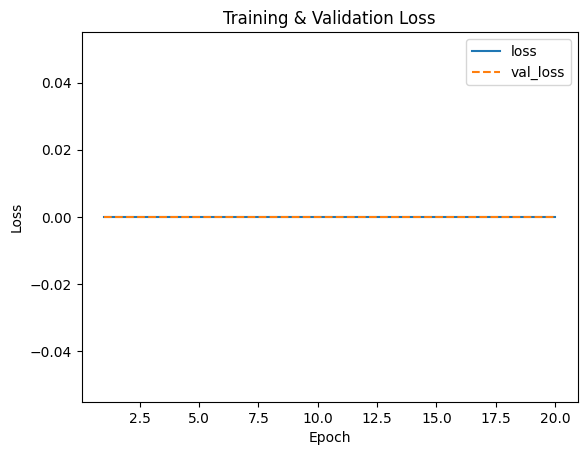

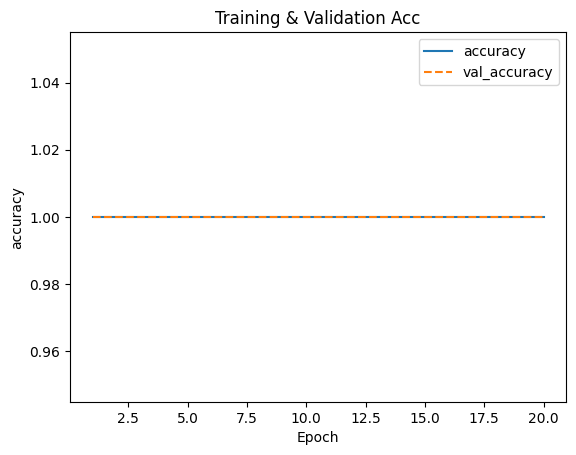

k=0 Best accuracy at epoch=1 val_accuracy=1.000
第 1 摺訓練與驗證
Epoch 1/20
6/6 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 948ms/epoch - 158ms/step
Epoch 2/20
6/6 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 821ms/epoch - 137ms/step
Epoch 3/20
6/6 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 822ms/epoch - 137ms/step
Epoch 4/20
6/6 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 819ms/epoch - 136ms/step
Epoch 5/20
6/6 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 839ms/epoch - 140ms/step
Epoch 6/20
6/6 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 825ms/epoch - 137ms/step
Epoch 7/20
6/6 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 827ms/epoch - 138ms/step
Epoch 8/20
6/6 - 1s - lo

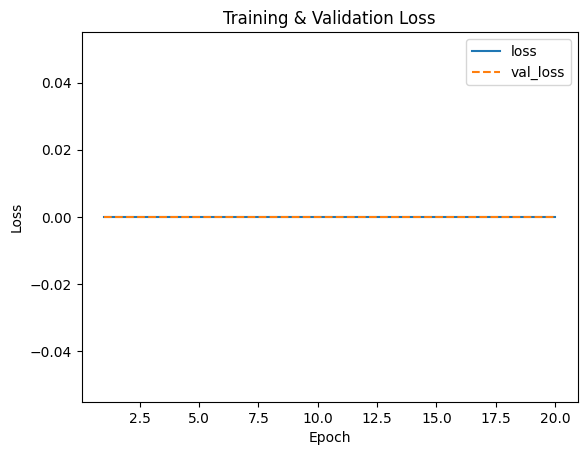

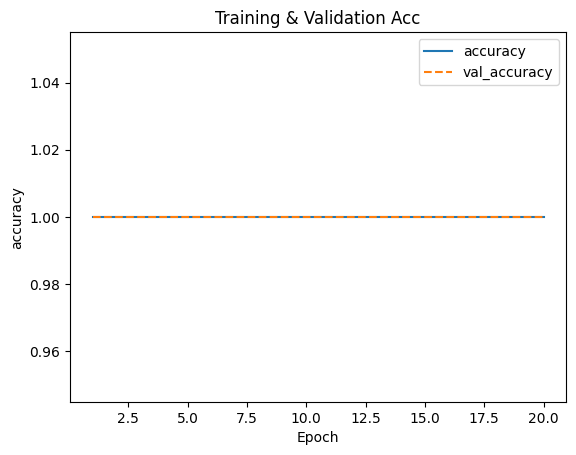

k=1 Best accuracy at epoch=1 val_accuracy=1.000
第 2 摺訓練與驗證
Epoch 1/20
6/6 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 970ms/epoch - 162ms/step
Epoch 2/20
6/6 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 829ms/epoch - 138ms/step
Epoch 3/20
6/6 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 831ms/epoch - 139ms/step
Epoch 4/20
6/6 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 837ms/epoch - 140ms/step
Epoch 5/20
6/6 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 829ms/epoch - 138ms/step
Epoch 6/20
6/6 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 832ms/epoch - 139ms/step
Epoch 7/20
6/6 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 830ms/epoch - 138ms/step
Epoch 8/20
6/6 - 1s - lo

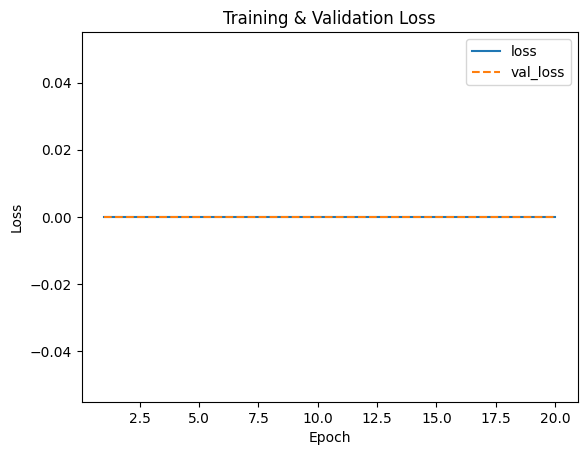

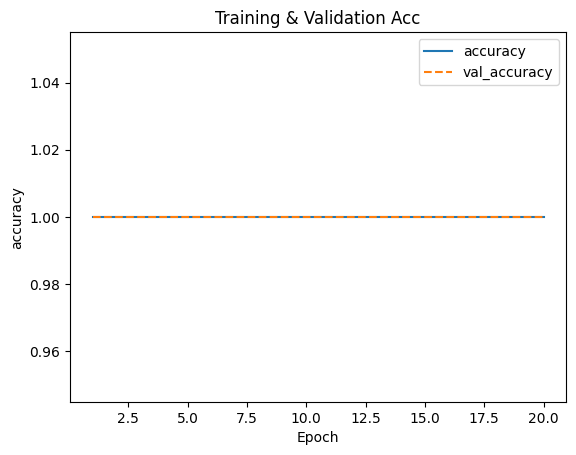

k=2 Best accuracy at epoch=1 val_accuracy=1.000
第 3 摺訓練與驗證
Epoch 1/20
6/6 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 960ms/epoch - 160ms/step
Epoch 2/20
6/6 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 836ms/epoch - 139ms/step
Epoch 3/20
6/6 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 838ms/epoch - 140ms/step
Epoch 4/20
6/6 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 836ms/epoch - 139ms/step
Epoch 5/20
6/6 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 836ms/epoch - 139ms/step
Epoch 6/20
6/6 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 845ms/epoch - 141ms/step
Epoch 7/20
6/6 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 846ms/epoch - 141ms/step
Epoch 8/20
6/6 - 1s - lo

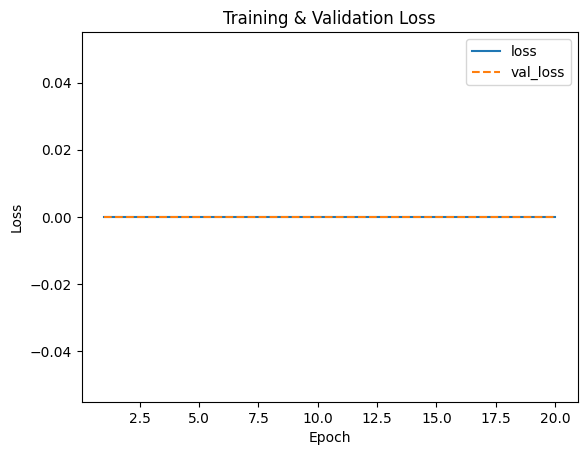

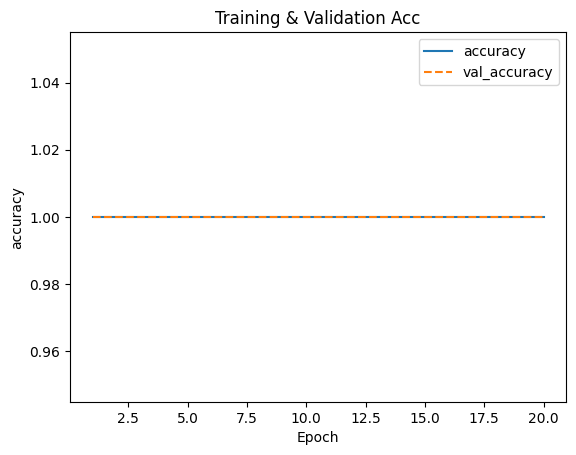

k=3 Best accuracy at epoch=1 val_accuracy=1.000
第 4 摺訓練與驗證
Epoch 1/20
6/6 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 986ms/epoch - 164ms/step
Epoch 2/20
6/6 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 849ms/epoch - 141ms/step
Epoch 3/20
6/6 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 850ms/epoch - 142ms/step
Epoch 4/20
6/6 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 852ms/epoch - 142ms/step
Epoch 5/20
6/6 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 844ms/epoch - 141ms/step
Epoch 6/20
6/6 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 842ms/epoch - 140ms/step
Epoch 7/20
6/6 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 841ms/epoch - 140ms/step
Epoch 8/20
6/6 - 1s - lo

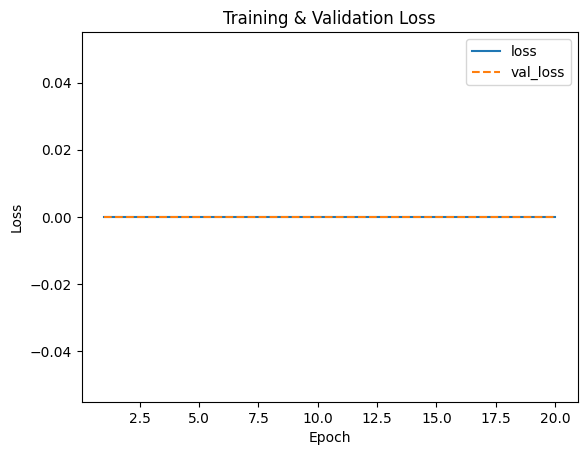

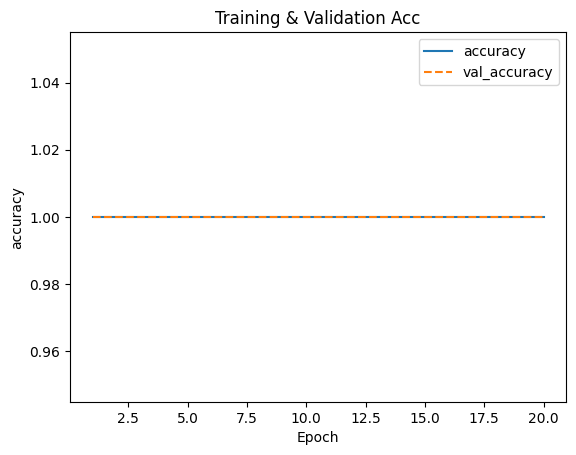

k=4 Best accuracy at epoch=1 val_accuracy=1.000


In [ ]:
# k-fold validation
# print('開始 k 摺驗證')
# X 是 shuffle 完後的資料(未SMOTE)
for i in range(5):
    print(f'第 {i} 摺訓練與驗證')
    fr, to = i*ksize, (i+1)*ksize  #←計算驗證資料的起點 fr 和終點 to (不含)
    x_val = X[fr: to]        #←取出驗證樣本
    x_trn = np.concatenate([X[ :fr],  #←取出訓練樣本：取驗證資料以外的部份
                            X[to: ]], axis=0)
    y_val = y[fr: to]        #←取出驗證標籤
    y_trn = np.concatenate([y[ :fr],  #←取出訓練標籤：取驗證資料以外的部份
                            y[to: ]], axis=0)

    model.set_weights(wt)  #←還原初始權重 (效果等於重建模型, 以便重新訓練)
    history =  model.fit(x_trn, y_trn,
                         validation_data=(x_val, y_val),
                         epochs=20,
                         batch_size=32,
                         class_weight={0:1.0,1:5.0},
                         verbose=2)
    hv = history.history['val_accuracy']  #←取得驗證的歷史記錄
    idx = np.argmax(hv)       #←找出最佳驗證週期
    val = hv[idx]             #←取得最佳驗證的 acc 值
    plot(history.history,
       ('loss', 'val_loss'),          #←歷史資料中的 key
       'Training & Validation Loss',  #←線圖的標題
       ('Epoch','Loss'))              #←x,y 軸的名稱
    plot(history.history,
       ('accuracy', 'val_accuracy'),            #←歷史資料中的 key
       'Training & Validation Acc',   #←線圖的標題
       ('Epoch','accuracy'))               #←x,y 軸的名稱
    print(f'k={i} Best accuracy at epoch={idx+1} val_accuracy={val:.3f}')
    all_his_acc.append(history.history['accuracy'])     #←儲存 acc 歷史驗證資料
    all_his_loss.append(history.history['loss'])     #←儲存 acc 歷史驗證資料
    all_his_val.append(history.history['val_accuracy']) #←儲存 val_acc 歷史驗證資料
    all_his_val_loss.append(history.history['val_loss'])     #←儲存 acc 歷史驗證資料

9. 重新驗證

In [ ]:
#用 NumPy 的 mean平均值找出最佳驗證週期
avg_acc = np.mean(all_his_acc, axis=0)
avg_loss = np.mean(all_his_loss, axis=0)
avg_val = np.mean(all_his_val, axis=0)
avg_val_loss = np.mean(all_his_val_loss, axis=0)
idx = np.argmax(avg_val)  #←找出最佳平均驗證結果的週期 (由 0 算起)
val =avg_val[idx]         #←取得最佳平均驗證的 val_acc 值
print(f'平均的最佳週期={idx+1}, val_acc={val:.3f}')  #←顯示最佳週期 (由 1 算起) 及其 val_acc 值
print(f'acc={avg_acc[19]:.3f},loss={avg_loss[19]:.3f},val_acc={avg_val[19]:.3f},val_loss={avg_val_loss[19]:.3f}')

平均的最佳週期=1, val_acc=1.000
acc=1.000,loss=0.000,val_acc=1.000,val_loss=0.000


In [ ]:
# #用 NumPy 的 argmax最大值找出最佳驗證週期
# avg_acc = np.argmax(all_his_acc, axis=0)
# avg_loss = np.argmax(all_his_loss, axis=0)
# avg_val = np.argmax(all_his_val, axis=0)
# avg_val_loss = np.argmax(all_his_val_loss, axis=0)
# idx = np.argmax(avg_val)  #←找出最佳平均驗證結果的週期 (由 0 算起)
# val =avg_val[idx]         #←取得最佳平均驗證的 val_acc 值
# print(f'平均的最佳週期={idx+1}, val_acc={val:.3f}')  #←顯示最佳週期 (由 1 算起) 及其 val_acc 值
# print(f'acc={avg_acc[19]:.3f},loss={avg_loss[19]:.3f},val_acc={avg_val[19]:.3f},val_loss={avg_val_loss[19]:.3f}')

In [ ]:
# wtFE1 = model.get_weights()

In [ ]:
#以最佳驗證週期訓練並評估成效
print(f'用所有的訓練資料重新訓練到第 {idx+1} 週期')
model.set_weights(wt)  #←還原初始權重 (效果等於重建模型, 以便重新訓練)
history = model.fit(x_trn, y_trn,
                    class_weight={0:1.0,1:5.0},
                    epochs=idx+1,  #←訓練到最佳週期就停止
                    batch_size=16,
                    verbose=2,
                    validation_data=(x_val, y_val))
model.evaluate(Xtest,ytest)
wtFE1 = model.get_weights()

用所有的訓練資料重新訓練到第 1 週期
12/12 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 1s/epoch - 95ms/step
2/2 [==============================] - 0s 33ms/step - loss: 22.1381 - accuracy: 0.8684


In [ ]:
# #Fine-Tuning
# #解凍最後一層
# ResNet50V2.trainable = False
# tuning_layer_name = 'conv5_block1_preact_bn'
# tuning_layer = ResNet50V2.get_layer(tuning_layer_name)
# tuning_index = ResNet50V2.layers.index(tuning_layer)

# for layer in ResNet50V2.layers[tuning_index:]:
#     layer.trainable = True

In [ ]:
# from tensorflow.keras.optimizers import RMSprop, Adam
# model.compile(optimizer=Adam(learning_rate=0.0001),
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
# model.summary()

In [ ]:
# wtFE = model.get_weights()    #←儲存模型的初始權重
# ksize = len(X) // 5   #←計算每折的資料筆數
# all_his_acc = []   #←建立變數來儲存每次訓練的 acc 歷史資料
# all_his_loss = []   #←建立變數來儲存每次訓練的 loss 歷史資料
# all_his_val = []   #←建立變數來儲存每次訓練的 val_acc 歷史資料
# all_his_val_loss = []   #←建立變數來儲存每次訓練的 val_loss 歷史資料

In [ ]:
# print('開始 k 摺驗證')
# for i in range(5):
#     print(f'第 {i} 摺訓練與驗證')
#     fr, to = i*ksize, (i+1)*ksize  #←計算驗證資料的起點 fr 和終點 to (不含)
#     x_val = X[fr: to]        #←取出驗證樣本
#     x_trn = np.concatenate([X[ :fr],  #←取出訓練樣本：取驗證資料以外的部份
#                             X[to: ]], axis=0)
#     y_val = y[fr: to]        #←取出驗證標籤
#     y_trn = np.concatenate([y[ :fr],  #←取出訓練標籤：取驗證資料以外的部份
#                             y[to: ]], axis=0)

#     model.set_weights(wtFE)  #←還原初始權重 (效果等於重建模型, 以便重新訓練)
#     history =  model.fit(x_trn, y_trn,
#                          validation_data=(x_val, y_val),
#                          epochs=20,
#                          batch_size=16,
#                          class_weight={0:1.0,1:10.0},
#                          verbose=2)
#     hv = history.history['val_accuracy']  #←取得驗證的歷史記錄
#     idx = np.argmax(hv)       #←找出最佳驗證週期
#     val = hv[idx]             #←取得最佳驗證的 acc 值
#     plot(history.history,
#        ('loss', 'val_loss'),          #←歷史資料中的 key
#        'Training & Validation Loss',  #←線圖的標題
#        ('Epoch','Loss'))              #←x,y 軸的名稱
#     plot(history.history,
#        ('accuracy', 'val_accuracy'),            #←歷史資料中的 key
#        'Training & Validation Acc',   #←線圖的標題
#        ('Epoch','accuracy'))               #←x,y 軸的名稱
#     print(f'k={i} Best accuracy at epoch={idx+1} accuracy={val:.3f}')
#     all_his_acc.append(history.history['accuracy'])     #←儲存 acc 歷史驗證資料
#     all_his_loss.append(history.history['loss'])     #←儲存 acc 歷史驗證資料
#     all_his_val.append(history.history['val_accuracy']) #←儲存 val_acc 歷史驗證資料
#     all_his_val_loss.append(history.history['val_loss'])     #←儲存 acc 歷史驗證資料

In [ ]:
# #用 NumPy 的 mean平均值找出最佳驗證週期
# avg_acc = np.mean(all_his_acc, axis=0)
# avg_loss = np.mean(all_his_loss, axis=0)
# avg_val = np.mean(all_his_val, axis=0)
# avg_val_loss = np.mean(all_his_val_loss, axis=0)
# idx = np.argmax(avg_val)  #←找出最佳平均驗證結果的週期 (由 0 算起)
# val =avg_val[idx]         #←取得最佳平均驗證的 val_acc 值
# print(f'平均的最佳週期={idx+1}, val_acc={val:.3f}')  #←顯示最佳週期 (由 1 算起) 及其 val_acc 值
# print(f'acc={avg_acc[19]:.3f},loss={avg_loss[19]:.3f},val_acc={avg_val[19]:.3f},val_loss={avg_val_loss[19]:.3f}')

In [ ]:
# #以最佳驗證週期訓練並評估成效
# print(f'用所有的訓練資料重新訓練到第 {idx+1} 週期')
# model.set_weights(wtFE1)  #←還原初始權重 (效果等於重建模型, 以便重新訓練)
# history = model.fit(x_trn, y_trn,
#                     class_weight={0:1.0,1:20.0},
#                     epochs=idx+1,  #←訓練到最佳週期就停止
#                     batch_size=16,
#                     verbose=2,
#                     validation_data=(x_val, y_val))
# model.evaluate(Xtest,ytest)
# wtFE2 = model.get_weights()

In [ ]:
# wtFE8272 = model.get_weights()
# model.set_weights(wtFE8272)
# model.evaluate(Xtest,ytest)
# model.save('ResNet(kfold5FT.8272).h5')

In [ ]:
# #Fine-Tuning
# #解凍最後一層
# ResNet50V2.trainable = False
# tuning_layer_name = 'conv4_block6_preact_bn'
# tuning_layer = ResNet50V2.get_layer(tuning_layer_name)
# tuning_index = ResNet50V2.layers.index(tuning_layer)

# for layer in ResNet50V2.layers[tuning_index:]:
#     layer.trainable = True

In [ ]:
# model.compile(optimizer=Adam(learning_rate=0.0001),
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
# model.summary()

In [ ]:
# wtFEcon4 = model.get_weights()    #←儲存模型的初始權重
# ksize = len(X) // 5   #←計算每折的資料筆數
# all_his_acc = []   #←建立變數來儲存每次訓練的 acc 歷史資料
# all_his_loss = []   #←建立變數來儲存每次訓練的 loss 歷史資料
# all_his_val = []   #←建立變數來儲存每次訓練的 val_acc 歷史資料
# all_his_val_loss = []   #←建立變數來儲存每次訓練的 val_loss 歷史資料

In [ ]:
# print('開始 k 摺驗證')
# for i in range(5):
#     print(f'第 {i} 摺訓練與驗證')
#     fr, to = i*ksize, (i+1)*ksize  #←計算驗證資料的起點 fr 和終點 to (不含)
#     x_val = X[fr: to]        #←取出驗證樣本
#     x_trn = np.concatenate([X[ :fr],  #←取出訓練樣本：取驗證資料以外的部份
#                             X[to: ]], axis=0)
#     y_val = y[fr: to]        #←取出驗證標籤
#     y_trn = np.concatenate([y[ :fr],  #←取出訓練標籤：取驗證資料以外的部份
#                             y[to: ]], axis=0)

#     model.set_weights(wtFEcon4)  #←還原初始權重 (效果等於重建模型, 以便重新訓練)
#     history =  model.fit(x_trn, y_trn,
#                          validation_data=(x_val, y_val),
#                          epochs=20,
#                          batch_size=16,
#                          class_weight={0:1.0,1:10.0},
#                          verbose=2)
#     hv = history.history['val_accuracy']  #←取得驗證的歷史記錄
#     idx = np.argmax(hv)       #←找出最佳驗證週期
#     val = hv[idx]             #←取得最佳驗證的 acc 值
#     plot(history.history,
#        ('loss', 'val_loss'),          #←歷史資料中的 key
#        'Training & Validation Loss',  #←線圖的標題
#        ('Epoch','Loss'))              #←x,y 軸的名稱
#     plot(history.history,
#        ('accuracy', 'val_accuracy'),            #←歷史資料中的 key
#        'Training & Validation Acc',   #←線圖的標題
#        ('Epoch','accuracy'))               #←x,y 軸的名稱
#     print(f'k={i} Best accuracy at epoch={idx+1} accuracy={val:.3f}')
#     all_his_acc.append(history.history['accuracy'])     #←儲存 acc 歷史驗證資料
#     all_his_loss.append(history.history['loss'])     #←儲存 acc 歷史驗證資料
#     all_his_val.append(history.history['val_accuracy']) #←儲存 val_acc 歷史驗證資料
#     all_his_val_loss.append(history.history['val_loss'])     #←儲存 acc 歷史驗證資料

In [ ]:
# #用 NumPy 的 mean平均值找出最佳驗證週期
# avg_acc = np.mean(all_his_acc, axis=0)
# avg_loss = np.mean(all_his_loss, axis=0)
# avg_val = np.mean(all_his_val, axis=0)
# avg_val_loss = np.mean(all_his_val_loss, axis=0)
# idx = np.argmax(avg_val)  #←找出最佳平均驗證結果的週期 (由 0 算起)
# val =avg_val[idx]         #←取得最佳平均驗證的 val_acc 值
# print(f'平均的最佳週期={idx+1}, val_acc={val:.3f}')  #←顯示最佳週期 (由 1 算起) 及其 val_acc 值
# print(f'acc={avg_acc[19]:.3f},loss={avg_loss[19]:.3f},val_acc={avg_val[19]:.3f},val_loss={avg_val_loss[19]:.3f}')

In [ ]:
# #以最佳驗證週期訓練並評估成效
# print(f'用所有的訓練資料重新訓練到第 {idx+1} 週期')
# model.set_weights(wtFE1)  #←還原初始權重 (效果等於重建模型, 以便重新訓練)
# history = model.fit(x_trn, y_trn,
#                     class_weight={0:1.0,1:10.0},
#                     epochs=idx+1,  #←訓練到最佳週期就停止
#                     batch_size=8,
#                     verbose=2,
#                     validation_data=(x_val, y_val))
# model.evaluate(Xtest,ytest)
# wtFE3 = model.get_weights()

In [ ]:
# print(f'用所有的訓練資料重新訓練到第 {idx+1} 週期')
# model.set_weights(wtFE1)  #←還原初始權重 (效果等於重建模型, 以便重新訓練)
# history = model.fit(x_trn, y_trn,
#                     class_weight={0:1.0,1:20.0},
#                     epochs=idx+1,  #←訓練到最佳週期就停止
#                     batch_size=8,
#                     verbose=2,
#                     validation_data=(x_val, y_val))
# model.evaluate(Xtest,ytest)
# wtFE4 = model.get_weights()

In [ ]:
# print(f'用所有的訓練資料重新訓練到第 {idx+1} 週期')
# model.set_weights(wtFE1)  #←還原初始權重 (效果等於重建模型, 以便重新訓練)
# history = model.fit(x_trn, y_trn,
#                     class_weight={0:1.0,1:50.0},
#                     epochs=idx+1,  #←訓練到最佳週期就停止
#                     batch_size=8,
#                     verbose=2,
#                     validation_data=(x_val, y_val))
# model.evaluate(Xtest,ytest)
# wtFE4 = model.get_weights()

In [ ]:
# print(f'用所有的訓練資料重新訓練到第 {idx+1} 週期')
# model.set_weights(wtFE1)  #←還原初始權重 (效果等於重建模型, 以便重新訓練)
# history = model.fit(x_trn, y_trn,
#                     class_weight={0:1.0,1:10.0},
#                     epochs=idx+1,  #←訓練到最佳週期就停止
#                     batch_size=16,
#                     verbose=2,
#                     validation_data=(x_val, y_val))
# model.evaluate(Xtest,ytest)
# wtFE5 = model.get_weights()

In [ ]:
# print(f'用所有的訓練資料重新訓練到第 {idx+1} 週期')
# model.set_weights(wtFE1)  #←還原初始權重 (效果等於重建模型, 以便重新訓練)
# history = model.fit(x_trn, y_trn,
#                     class_weight={0:1.0,1:10.0},
#                     epochs=idx+1,  #←訓練到最佳週期就停止
#                     batch_size=16,
#                     verbose=2,
#                     validation_data=(x_val, y_val))
# model.evaluate(Xtest,ytest)
# wtFE6 = model.get_weights()

In [ ]:
# print(f'用所有的訓練資料重新訓練到第 {idx+1} 週期')
# model.set_weights(wtFE1)  #←還原初始權重 (效果等於重建模型, 以便重新訓練)
# history = model.fit(x_trn, y_trn,
#                     class_weight={0:1.0,1:50.0},
#                     epochs=idx+1,  #←訓練到最佳週期就停止
#                     batch_size=16,
#                     verbose=2,
#                     validation_data=(x_val, y_val))
# model.evaluate(Xtest,ytest)
# wtFE7 = model.get_weights()

In [ ]:
model.set_weights(wtFE1)

2/2 [==============================] - 0s 92ms/step


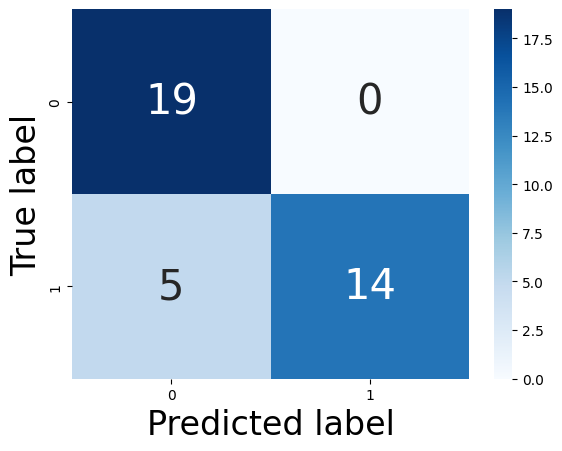

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        19
           1       1.00      0.74      0.85        19

    accuracy                           0.87        38
   macro avg       0.90      0.87      0.87        38
weighted avg       0.90      0.87      0.87        38



In [ ]:
Y_pred = model.predict(Xtest)
test_preds = (Y_pred >= 0.2).astype(int)
test_trues = ytest
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(test_trues, test_preds)
sns.heatmap(cm, annot=True,fmt='.20g',annot_kws={'size':30}, cmap='Blues')
plt.xlabel('Predicted label',fontsize=24)
plt.ylabel('True label',fontsize=24)
plt.show()
print(classification_report(test_trues, test_preds))

In [ ]:
from sklearn.metrics import roc_auc_score
#calculate AUC of model
auc = roc_auc_score(test_trues, test_preds)
#print AUC score
print(auc)

0.868421052631579


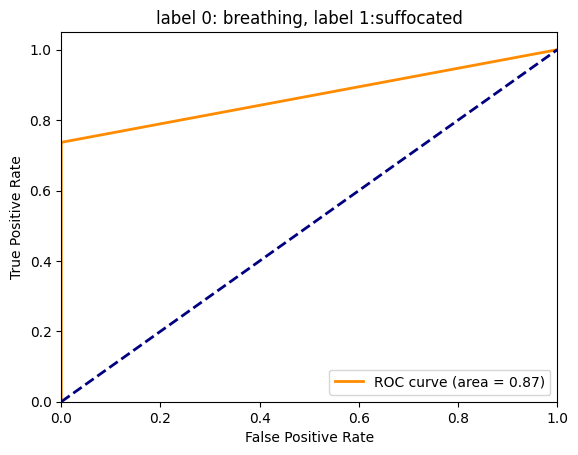

In [ ]:
#ROC by chatgpt
from sklearn.metrics import roc_curve, auc

# 计算 ROC 曲线和 AUC
fpr, tpr, thresholds = roc_curve(test_trues, test_preds)
roc_auc = auc(fpr, tpr)

# 绘制 ROC 曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('label 0: breathing, label 1:suffocated')
plt.legend(loc="lower right")
plt.show()